In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "/home/frang/.cache/kagglehub/datasets/Cornell-University/arxiv/versions/240/arxiv-metadata-oai-snapshot.json"
items = []
with open(filepath, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i >= 100000:
            break
        items.append(json.loads(line))

In [6]:
filtered_df = [
    {
        'title': entry.get('title', ''),
        'abstract': entry.get('abstract', ''),
        'categories': entry.get('categories', ''),
        'published': entry.get('published', entry.get('update_date', ''))
    }
    for entry in items

]
df = pd.DataFrame(filtered_df)

In [7]:
df['categories'] = df['categories'].str.split(' ')

In [15]:
good_categories = subgenre_counts[subgenre_counts >= 50]

In [23]:
good_categories = good_categories.reset_index()

In [37]:
def filter_category_list(cat_list):
    return [cat for cat in cat_list if cat in set(good_categories['categories'])]

In [38]:
df['filtered_categories'] = df['categories'].apply(filter_category_list)

In [41]:
df['filtered_categories']

0                                  [hep-ph]
1                          [math.CO, cs.CG]
2                          [physics.gen-ph]
3                                 [math.CO]
4                        [math.CA, math.FA]
                        ...                
99995    [physics.gen-ph, physics.class-ph]
99996                    [math.RT, math.NT]
99997                               [cs.AR]
99998                            [astro-ph]
99999                      [cs.IT, math.IT]
Name: filtered_categories, Length: 100000, dtype: object

In [43]:
subgenre_counts = df['filtered_categories'].explode().value_counts()

/tmp/ipykernel_9141/2514284637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subgenre_counts.index, y=subgenre_counts.values, palette='viridis')


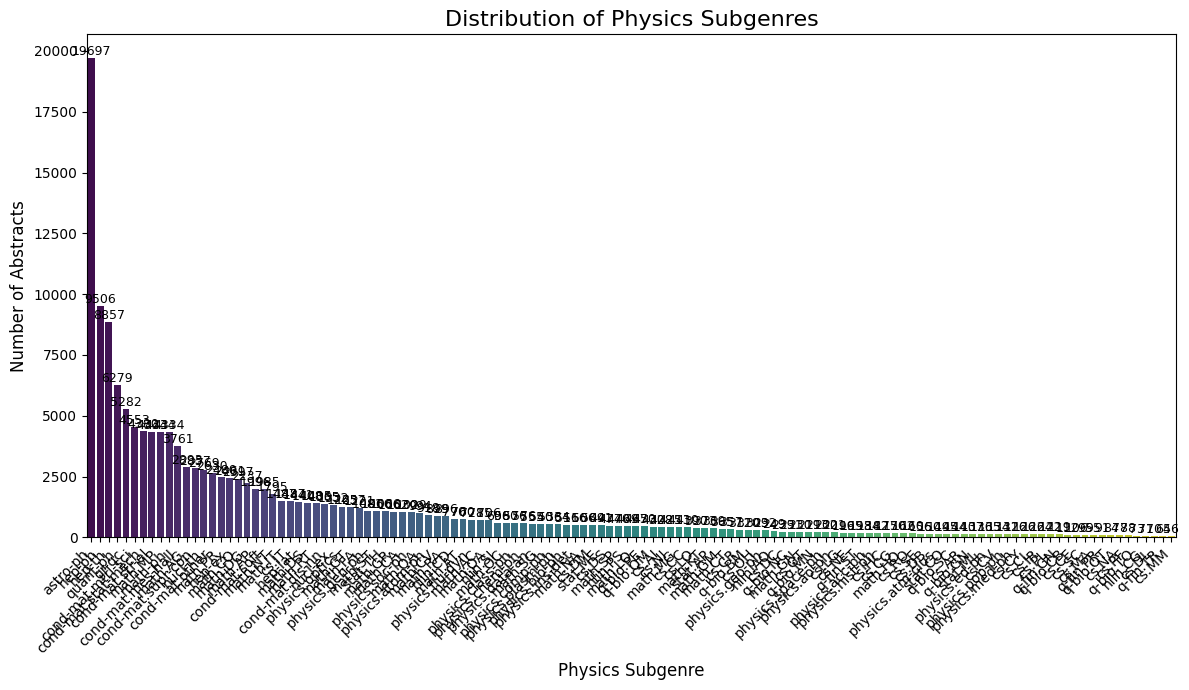

In [44]:
plt.figure(figsize=(12, 7)) # Adjust figure size as needed for readability
sns.barplot(x=subgenre_counts.index, y=subgenre_counts.values, palette='viridis')

# Add labels and title
plt.title('Distribution of Physics Subgenres', fontsize=16)
plt.xlabel('Physics Subgenre', fontsize=12)
plt.ylabel('Number of Abstracts', fontsize=12)

# Rotate x-axis labels if they are overlapping
plt.xticks(rotation=45, ha='right', fontsize=10) # ha='right' aligns the label to the right of the tick

# Add count labels on top of the bars for better readability
for index, value in enumerate(subgenre_counts.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9) # Adjust offset (0.1) if needed

plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

In [4]:
df = pd.read_parquet("../data/arxiv_100k.parquet")

In [11]:
def format_prompt(row):
    cats_str = ' '.join(row['filtered_categories'])

    return (
        f"categories: {cats_str}\n\n"
        f"title: {row['title']}\n\n"
        f"abstract: "
    )

In [12]:
df['input'] = df.apply(format_prompt, axis=1)

In [13]:
df['input'][0]

'categories: hep-ph\n\ntitle: Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies\n\nabstract: '

In [16]:
df.to_parquet("arxiv_100k.parquet", index=False)

In [15]:
df.head()

,title,abstract,categories,published,filtered_categories,input
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,[hep-ph],2008-11-26,[hep-ph],categories: hep-ph\n\ntitle: Calculation of pr...
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...","[math.CO, cs.CG]",2008-12-13,"[math.CO, cs.CG]",categories: math.CO cs.CG\n\ntitle: Sparsity-c...
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,[physics.gen-ph],2008-01-13,[physics.gen-ph],categories: physics.gen-ph\n\ntitle: The evolu...
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,[math.CO],2007-05-23,[math.CO],categories: math.CO\n\ntitle: A determinant of...
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,"[math.CA, math.FA]",2013-10-15,"[math.CA, math.FA]",categories: math.CA math.FA\n\ntitle: From dya...
